Compartilhar o Jupyter notebook: https://nbviewer.jupyter.org/

# Questão 5) 

### Algoritmo Método da Bissecção
###### Algoritmo baseado no Algoritmo do Abel Siqueira e no Algoritmo apresentado no livro "Algoritmos Numéricos"  do Frederico Campos, p. 259.

In [170]:
"""
(x, fx) = bisseccao(f, a, b, tol, mit)
"""
function bisseccao(f, a, b, tol, mit)
    fa = f(a)
    fb = f(b)
    erro = 0
    iter = 0
    
     if fa * fb > 0
        print("Função não muda de sinal nos extremos do intervalo dado.")
    end
    
    
    x = (a + b)/2
    fx = f(x)

    
    resolvido = (abs(b-a)<=tol)
    cansado = (iter > mit)
    
    while !(resolvido || cansado)
        iter = iter + 1
        
        if fa*fx < 0
            b = x
            fb = fx
        else 
            a=x
            fa = fx
        end
        
        x = (a+b)/2
        fx = f(x)
        erro = (b-a)
    
        resolvido = (abs(b-a)<=tol)
        cansado = (iter >= mit)
    end
    
    return x, iter, erro
end 

bisseccao

***Um exemplo de quando o intervalo escolhido não é adequado***

In [171]:
p(x)=x^2
A, B = 1, 2
C = 0.01
D = 100
bisseccao(p, A, B, C, D)


Função não muda de sinal nos extremos do intervalo dado.

(1.99609375, 7, 0.0078125)

### Letra a)


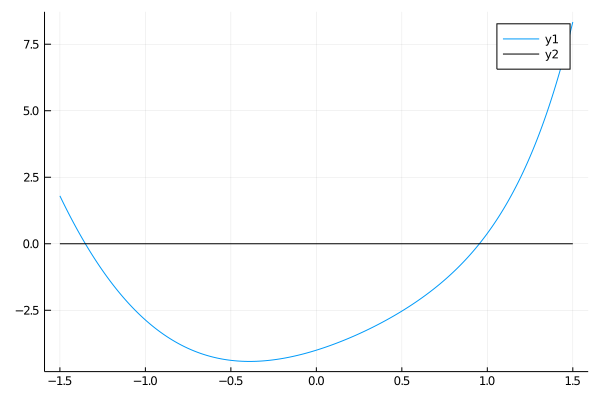

In [137]:
f(x)=exp(2x)-2(x^3)-5

x1=-1.5
x2=1.5


x=x1:0.01:x2

using Plots

plot(x,f)
plot!([x1,x2],[0,0], color="black")

###### Ajuda na resolução do exercício a mão. (Calcula o x e o f(x))

In [139]:
f(x)=exp(2x)-2(x^3)-5
a,b = 0.5, 1.5

(0.5, 1.5)

In [140]:
x = (a + b)/2
if f(a) * f(x) < 0
    b=x
else
    a=x
end
x, f(x)



(1.0, 0.3890560989306504)

###### Aplicação do algortimo 'bisseccao' na função f (obtendo, x_final, nº de iter e abs(b-a)=crit. de parada)

In [147]:
f(x) = exp(2x)-2(x^3)-5
a, b = 0.5, 1.5
c=0.001
d=100
bisseccao(f, a, b, c, d)


(0.95361328125, 10, 0.0009765625)

## Letra b)


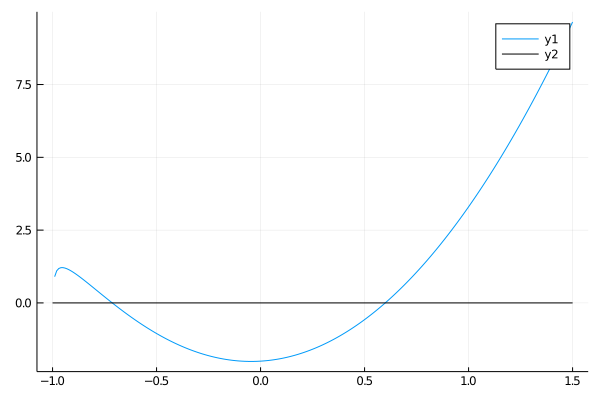

In [148]:
g(y)=5(y^2)+log10(y+1)-2

y3=-1
y4=1.5


y=y3:0.01:y4

plot(y,g)
plot!([x3,x4],[0,0], color="black")

###### Ajuda no calculo a mão determinando os valores de x e de f(x) respectivo. 

In [149]:
g(y)=5(y^2)+log10(y+1)-2
A, B = 0.5, 0.8


(0.5, 0.8)

In [150]:
y = (A + B)/2
if g(A) * g(y) < 0
    B=y
else
    A=y
end
y, g(y)

(0.65, 0.32998394421390653)

###### Aplicação do algortimo 'bisseccao' na função g (obtendo, y_final,  nº de iter e abs(b-a)=crit. de parada)

In [152]:
g(y)=5(y^2)+log10(y+1)-2
A, B = 0.5, 0.8
C = 0.001
D=100
bisseccao(g, A, B, C, D)

(0.59931640625, 9, 0.0005859375000000222)

## Questão 9 

Aplicação do Método da Bissecção para achar a velocidade desejada. 

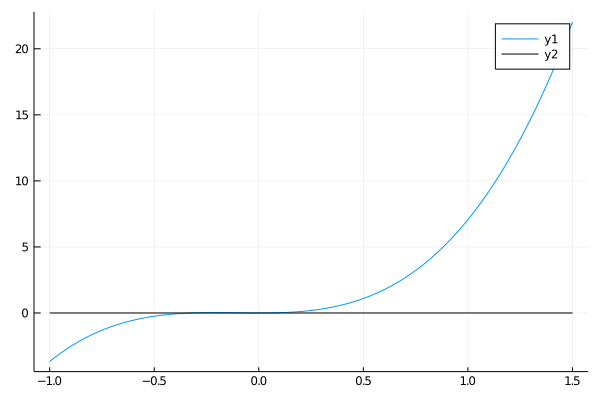

In [153]:
h(x)=1.7x^2+16.085((1/2)*(exp(x)-exp(-x))-sin(x))

x1=-1
x2=1.5


x=x1:0.01:x2

plot(x,h)
plot!([x1,x2],[0,0], color="black")

In [131]:
h(x)=1.7x^2+16.085((1/2)*(exp(x)-exp(-x))-sin(x))
A, B = -1, -0,001
C = 0.00001
D = 100
bisseccao(h, A, B, C, D)

(-0.3170585632324219, 17, 7.62939453125e-6)

# Questão 18) (a)

### Algoritmo de Newton

In [256]:
"""
(x, fx) = newton(f, a, b, tol, mit)
"""
function newton(f, fd, x;
                tol = 0.00001,
                max_tempo = 10.0, max_iter = 1000,)
    fx = f(x)
    ϵ = tol
    fdx = fd(x)
    
    iter = 0
    t0 = time()
    δ = time() - t0
    
    exitflag = :desconhecido
    resolvido = ( abs(-fx/fdx) < ϵ)
    cansado = (iter >= max_iter || δ >= max_tempo)
    
    while !(resolvido || cansado)
         iter = iter +1
        fdx = fd(x)
        if abs(fdx) <= ϵ
            exitflag = :desconhecido 
            break
        end
        dtx = - fx / fdx
        x = x + dtx
        fx = f(x)
        
       
         δ = time() - t0
        resolvido = ( abs(-fx/fdx) < ϵ)
        cansado = (iter >= max_iter || δ >= max_tempo)

    end

    if resolvido 
        exitflag = :sucesso
    elseif cansado 
        if iter >= max_iter
            exitflag = :max_iter
        else 
            exitflag = :max_tempo
        end
    end
    
    return x, fx, iter, exitflag
end


newton

In [349]:
f(x)=4x^3+x+cos(x)-10
h(x) = 12x^2 + 1 - sin(x)
x=2

newton(f, h, x)

(1.282264050052825, 9.346710767133004e-6, 4, :sucesso)

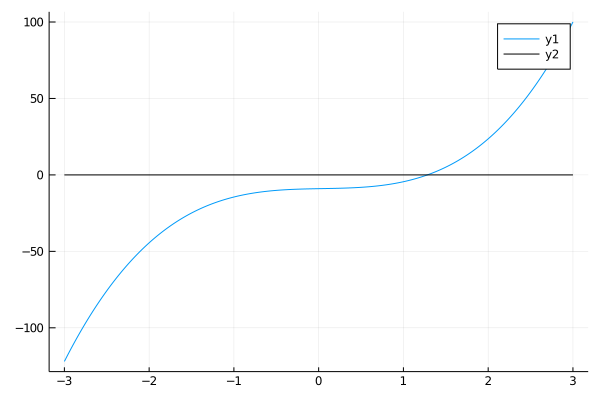

In [160]:
f(x)=4x^3+x+cos(x)-10

x1=-3
x2=3


x=x1:0.01:x2

plot(x,f)
plot!([x1,x2],[0,0], color="black")

***Gráfico da segunda derivada***

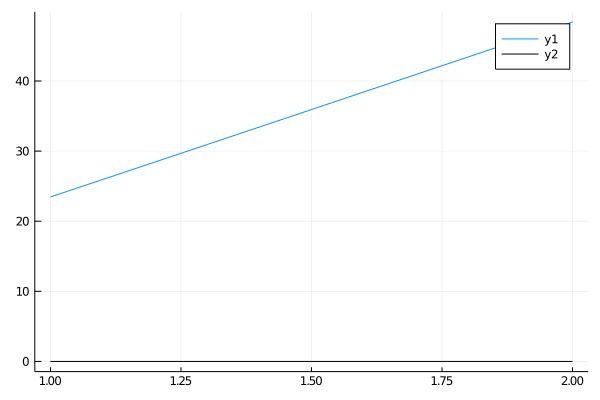

In [162]:
f(x)=24x-cos(x)

x1=1
x2=2


x=x1:0.01:x2

plot(x,f)
plot!([x1,x2],[0,0], color="black")

In [348]:
f(x)=4(x)^3 + x + cos(x) - 10
x=1.282263577322263
f(x)


3.40349970429088e-12

In [346]:
h(x) = 12(x)^2 + 1 - sin(x)
x=1.282264050052825
h(x)

19.771750586730867

In [347]:
x =1.282264050052825
y =- f(x) / h(x)

-4.727305620275085e-7